<class 'numpy.ndarray'> (252, 595, 3)


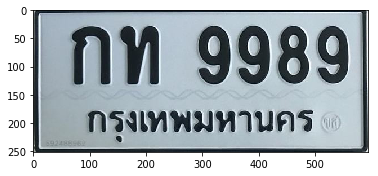

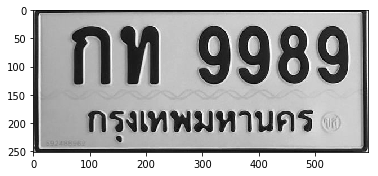

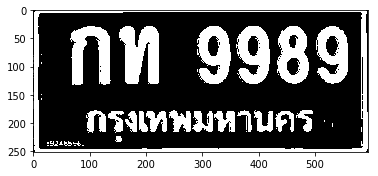

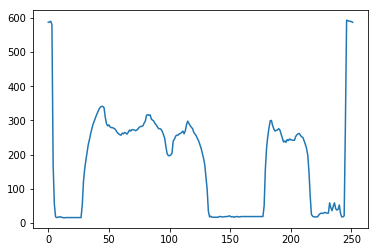

[[0, 4], [29, 102], [179, 36], [245, 6]]
89.0


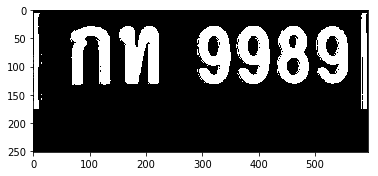

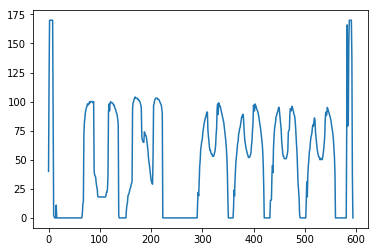

[[0, 9], [67, 69], [154, 68], [291, 59], [362, 58], [433, 56], [503, 56], [582, 11]]
11


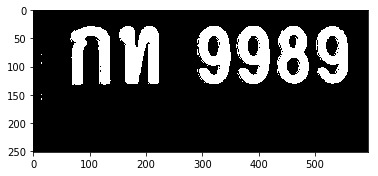

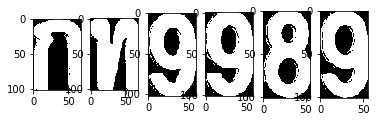

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

img = io.imread("hq.jpg")
print(type(img),img.shape)
plt.imshow(img)
plt.show()
plt.close()

grayscaled=np.zeros((img.shape[0],img.shape[1]),np.ubyte)
grayscaled[:,:]=(img[:,:,0]*0.2125)+(img[:,:,1]*0.7154)+(img[:,:,2]*0.0721)

plt.imshow(grayscaled, cmap=plt.cm.gray)
plt.show()
plt.close()

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
binary=np.zeros((img.shape[0],img.shape[1]),np.ubyte)
maskscale=np.mean(grayscaled)
binary=(grayscaled<maskscale)*1

plt.imshow(binary, cmap=plt.cm.gray)
plt.show()
plt.close()

cy= [np.sum(binary[i,:]==1) for i in range(binary.shape[0])]
cy=np.array(cy)
plt.plot(cy)
plt.show()
plt.close()

def findrangeoflist(var,moth):
    cymask=(var<=moth)
    nowcontinewus=False
    locatey=list()
    for i in range(len(cymask)):
        if cymask[i]==False and nowcontinewus==False:
            nowcontinewus=True
            la=locatey.append([i,0])
        elif cymask[i]==False and nowcontinewus==True:
            locatey[len(locatey)-1][1]=locatey[len(locatey)-1][1]+1
        elif cymask[i]==True and nowcontinewus==True:
            nowcontinewus=False
    return locatey
bamx=cy.mean()
bami=0
nowp=(bamx+bami)//2
while True:
    rann=findrangeoflist(cy,nowp)
    if len(rann)==4:
        break
    elif len(rann)>=4:
        bamx=nowp
        nowp=(bamx+bami)//2
    else:
        bami=nowp
        nowp=(bamx+bami)//2
print(rann)
print(nowp)
st=rann[1]
binary[:rann[0][0]+rann[0][1]+2,:]=0
binary[rann[len(rann)-2][0]-3:,:]=0
plt.imshow(binary, cmap=plt.cm.gray)
plt.show()
plt.close()

cx= [np.sum(binary[:,i]==1) for i in range(binary.shape[1])]
cx=np.array(cx)

plt.plot(cx)
plt.show()
plt.close()

bamx=cx.mean()
bami=0
nowbf=-1
nowp=(bamx+bami)//2
nowp=0
while 1:
    rann=findrangeoflist(cx,nowp)
    if len(rann)>=5 and len(rann)<=8:
        break
    elif len(rann)<5:
        bamx=nowp
    else:
        bami=nowp
    nowp=nowp+1
print(rann)
print(nowp)

binary[:,:rann[0][0]+rann[0][1]+5]=0
binary[:,rann[len(rann)-1][0]-5:]=0
plt.imshow(binary, cmap=plt.cm.gray)
plt.show()
plt.close()

import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
fig, ax = plt.subplots(ncols=len(rann)-2,nrows=1)
for i in range(1,len(rann)-1):
    ax[i-1].imshow(binary[ st[0] : st[0]+st[1] , rann[i][0]:rann[i][0]+rann[i][1] ] , cmap=plt.cm.gray)
plt.show()
plt.close()